In [23]:
#Combined for all the Canadian NBA Players
from nba_api.stats.static import players
from nba_api.stats.endpoints import shotchartdetail
from nba_api.stats.library.parameters import SeasonAll
from nba_api.stats import endpoints
import pandas as pd 
import time 
import datetime 
#import boto3
from io import StringIO
from datetime import datetime, timedelta
from time import strftime
#from sqlalchemy import create_engine
#import pymysql 
#import mysql.connector as sql
#import boto3 
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle, Arc

In [24]:
#All different parts of the complete NBA season
season_type_all_star = [
        'Pre Season',
        'Regular Season',
        'All Star',
        'Playoffs'
        ]

In [25]:
#Get season date to call API for 
now = datetime.now()
list_months = ['8','9','10','11','12']
if strftime('%m') in list_months: 
    season_grab = now.year
else: 
    season_grab = now.year - 1
    
season_grab = str(season_grab) + '-' + str(season_grab + 1)[-2:]
    
#Get date to call API for 
yesterday = now - timedelta(days=1)
yesterdayStr = yesterday.strftime('%m/%d/%Y') 

yesterdayStr

'02/27/2021'

In [26]:
#Create empty dataframe for the data 
df_player_shot_total = pd.DataFrame(columns=['GRID_TYPE','GAME_ID','GAME_EVENT_ID','PLAYER_ID','PLAYER_NAME','TEAM_ID','TEAM_NAME','PERIOD',
'MINUTES_REMAINING','SECONDS_REMAINING','EVENT_TYPE','ACTION_TYPE','SHOT_TYPE','SHOT_ZONE_BASIC',
'SHOT_ZONE_AREA','HOT_ZONE_RANGE','SHOT_DISTANCE','LOC_X','LOC_Y','SHOT_ATTEMPTED_FLAG','SHOT_MADE_FLAG','GAME_DATE','HTM','VTM'])
df_player_shot_total.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,HOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM


In [27]:
#Get Data for Jamal Murray for game played yesterday (player ID = 1627750, date 02/27/2021)
player_id = 1627750
team_id = 1610612743
#Call the API endpoint passing in players ID & which season 
for seasonType in season_type_all_star: 
    shotchart_player = shotchartdetail.ShotChartDetail(player_id = player_id,team_id = team_id,
                                                    season_type_all_star = seasonType, season_nullable=season_grab,
                                                    context_measure_simple = 'FGA', date_from_nullable = yesterdayStr)
    #Converts gamelog object into a pandas dataframe
    df_player_shortchart = shotchart_player.get_data_frames()[0]
    df_player_shortchart.insert(2,'Game_Type', seasonType)
    df_player_shot_total = df_player_shot_total.append(df_player_shortchart)
            
df_player_shot_total

/Users/Andrew/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,ACTION_TYPE,EVENT_TYPE,GAME_DATE,GAME_EVENT_ID,GAME_ID,GRID_TYPE,Game_Type,HOT_ZONE_RANGE,HTM,LOC_X,...,SHOT_ATTEMPTED_FLAG,SHOT_DISTANCE,SHOT_MADE_FLAG,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_ID,TEAM_NAME,VTM
0,Pullup Jump shot,Missed Shot,20210227,24,0022000518,Shot Chart Detail,Regular Season,NaN,OKC,13,...,1,14,0,2PT Field Goal,Center(C),Mid-Range,8-16 ft.,1610612743,Denver Nuggets,DEN
1,Pullup Jump shot,Missed Shot,20210227,35,0022000518,Shot Chart Detail,Regular Season,NaN,OKC,138,...,1,13,0,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,1610612743,Denver Nuggets,DEN
2,Cutting Layup Shot,Made Shot,20210227,45,0022000518,Shot Chart Detail,Regular Season,NaN,OKC,13,...,1,1,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612743,Denver Nuggets,DEN
3,Driving Floating Jump Shot,Made Shot,20210227,141,0022000518,Shot Chart Detail,Regular Season,NaN,OKC,-20,...,1,5,1,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612743,Denver Nuggets,DEN
4,Step Back Jump shot,Made Shot,20210227,195,0022000518,Shot Chart Detail,Regular Season,NaN,OKC,-33,...,1,18,1,2PT Field Goal,Center(C),Mid-Range,16-24 ft.,1610612743,Denver Nuggets,DEN
5,Pullup Jump shot,Missed Shot,20210227,199,0022000518,Shot Chart Detail,Regular Season,NaN,OKC,-95,...,1,16,0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612743,Denver Nuggets,DEN
6,Step Back Jump shot,Made Shot,20210227,223,0022000518,Shot Chart Detail,Regular Season,NaN,OKC,-2,...,1,26,1,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612743,Denver Nuggets,DEN
7,Running Layup Shot,Made Shot,20210227,246,0022000518,Shot Chart Detail,Regular Season,NaN,OKC,-13,...,1,1,1,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612743,Denver Nuggets,DEN
8,Jump Shot,Made Shot,20210227,281,0022000518,Shot Chart Detail,Regular Season,NaN,OKC,9,...,1,25,1,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612743,Denver Nuggets,DEN
9,Jump Shot,Missed Shot,20210227,300,0022000518,Shot Chart Detail,Regular Season,NaN,OKC,138,...,1,26,0,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,1610612743,Denver Nuggets,DEN


In [28]:
#Draw the basketball court for the images
def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

In [29]:
#Graph the data onto the basketball court drawing and add some stats 
df_player_shotchart = df_player_shot_total

oldformat = str(df_player_shotchart.iloc[0]['GAME_DATE'])
datetimeobject = datetime.strptime(oldformat,'%Y%m%d')
newformat = datetimeobject.strftime('%Y-%m-%d')
    
#Get misses and made datasets
df_player_made = df_player_shotchart.loc[df_player_shotchart['SHOT_MADE_FLAG'] == 1]
df_player_miss = df_player_shotchart.loc[df_player_shotchart['SHOT_MADE_FLAG'] == 0]

In [30]:
#Calculate some numbers for the charts
try:
    twoPointAtt = df_player_shotchart.groupby('SHOT_TYPE')['SHOT_ATTEMPTED_FLAG'].sum()[0]
    twoPointMade = df_player_shotchart.groupby('SHOT_TYPE')['SHOT_MADE_FLAG'].sum()[0]
    twoPointPer = (twoPointMade/twoPointAtt)
except:
    twoPointAtt = 0
    twoPointMade = 0
    twoPointPer = 0
        
twoPointText = '2PT: ' + str(twoPointMade) + ' of ' + str(twoPointAtt) + ' for ' + "{:.2%}".format(twoPointPer)
        
try:
    threePointAtt = df_player_shotchart.groupby('SHOT_TYPE')['SHOT_ATTEMPTED_FLAG'].sum()[1]
    threePointMade = df_player_shotchart.groupby('SHOT_TYPE')['SHOT_MADE_FLAG'].sum()[1]
    threePointPer = (threePointMade/threePointAtt)
except:
    threePointAtt = 0
    threePointMade = 0
    threePointPer = 0
        
threePointText = '3PT: ' + str(threePointMade) + ' of ' + str(threePointAtt) + ' for ' + "{:.2%}".format(threePointPer)
        
try: 
    totalAtt = df_player_shotchart['SHOT_ATTEMPTED_FLAG'].sum()
    totalMade = df_player_shotchart['SHOT_MADE_FLAG'].sum()
    totalPer = (totalMade/totalAtt)
except: 
    totalAtt = 0
    totalMade = 0
    totalPer = 0
        
    
totalPointText = 'Total: ' + str(totalMade) + ' of ' + str(totalAtt) + ' for ' + "{:.2%}".format(totalPer)
    
textForTitle = df_player_shotchart.iloc[0]['PLAYER_NAME'] + ' Shot Chart ' + df_player_shotchart.iloc[0]['HTM'] + ' vs.' + df_player_shotchart.iloc[0]['VTM'] + ' on ' + newformat
  

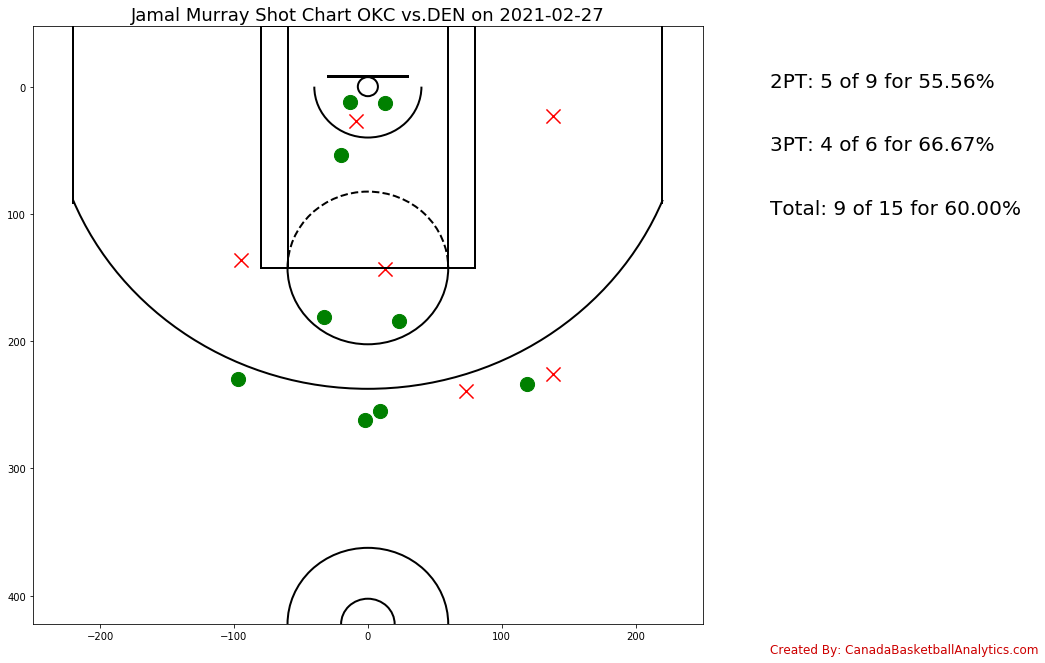

In [32]:
#Draw the shot charts 
plt.figure(figsize=(12,11))
plt.scatter(df_player_made.LOC_X, df_player_made.LOC_Y,marker='o', color='green',s=200)
plt.scatter(df_player_miss.LOC_X, df_player_miss.LOC_Y,marker='x', color='red',s=200)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
plt.ylim(422.5, -47.5)
plt.title(textForTitle, fontsize=18)
plt.text(300,445,'Created By: CanadaBasketballAnalytics.com',fontsize=12, color = '#CD0000')
plt.text(300, 0, twoPointText, fontsize=20)
plt.text(300, 50, threePointText, fontsize=20)
plt.text(300, 100, totalPointText, fontsize=20)
plt.show()